# EDA

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder, scale, minmax_scale

In [5]:
raw_data = pd.read_csv("train_ZoGVYWq.csv")

In [6]:
raw_data_no_na = raw_data.dropna()

In [12]:
processed_data = raw_data_no_na[:]
processed_data = processed_data.reset_index(drop=True)

In [9]:
# Are id's unique?
len(processed_data["id"].unique()), processed_data.shape[0]

(76855, 76855)

In [5]:
def labelencode(df):
    le = LabelEncoder()
    return le.fit_transform(df["residence_area_type"]), le.fit_transform(df["sourcing_channel"])

In [6]:
processed_data["residence_area_type"], processed_data["sourcing_channel"] = labelencode(processed_data)

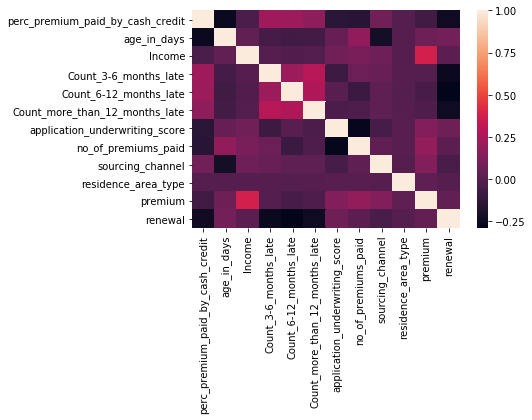

In [7]:
# Plot correlations
# pd.plotting.scatter_matrix(processed_data[processed_data.columns[1:]], figsize=(20, 20), marker='.', diagonal="hist",
#                           hist_kwds={'bins': 20})
sns.heatmap(processed_data[processed_data.columns[1:]].corr())

In [41]:
def plot_histogram(variable, bins=10):
    plt.figure(figsize=(10,10))
    plt.hist(variable, bins=bins)
    plt.xlabel(variable.name)

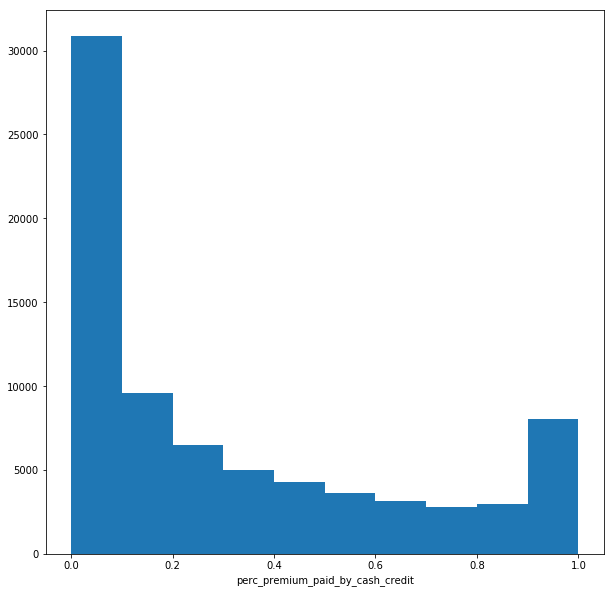

In [9]:
plot_histogram(processed_data["perc_premium_paid_by_cash_credit"])

The above says that large majority of people are using cash almost entirely and the second largest group are using almost credit cards completely.

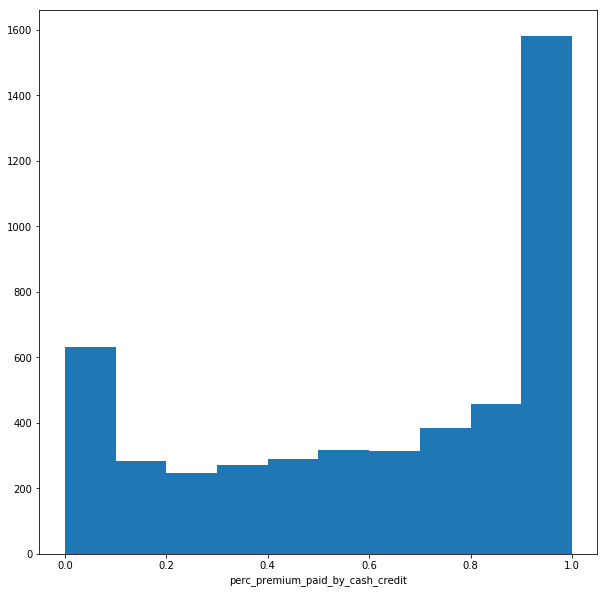

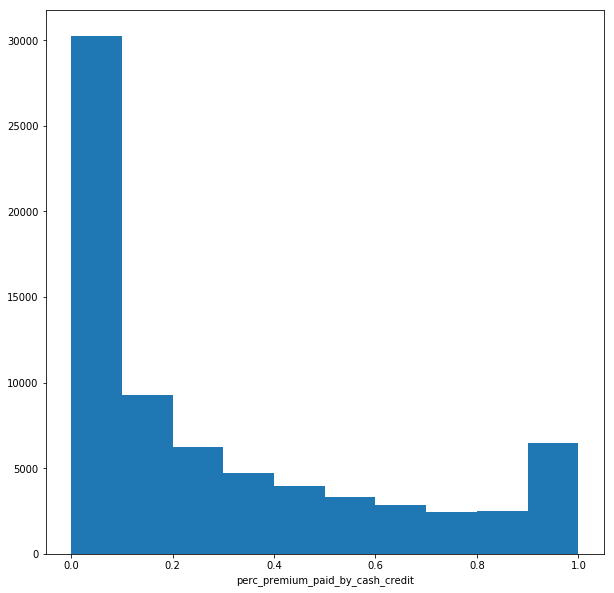

In [392]:
plot_histogram(processed_data["perc_premium_paid_by_cash_credit"][processed_data["renewal"] == False])
plot_histogram(processed_data["perc_premium_paid_by_cash_credit"][processed_data["renewal"] == True])

Can get rid of the middle section because it is just noise. Create new columsn which are mostly cash or mostly credit

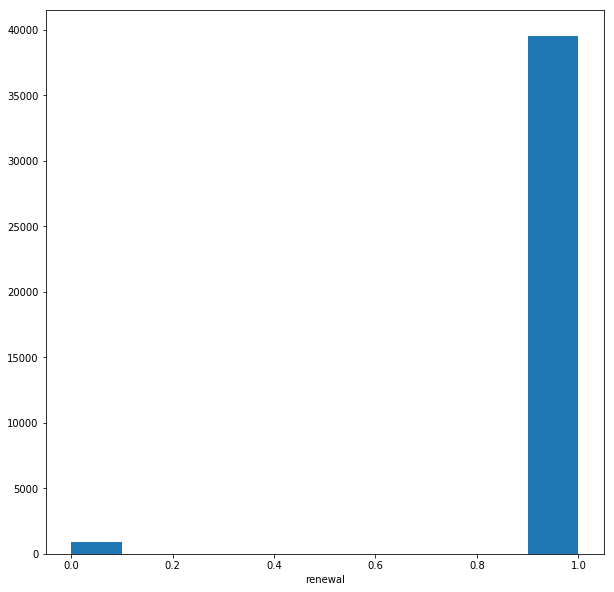

In [387]:
plot_histogram(processed_data["renewal"][processed_data["perc_premium_paid_by_cash_credit"] < 0.2])

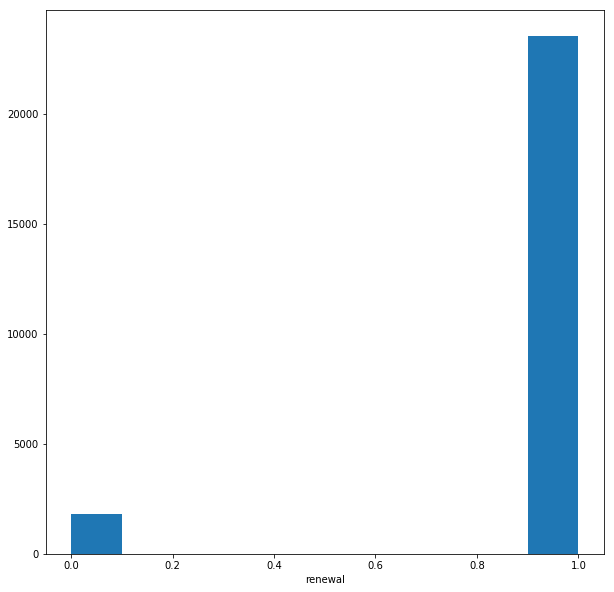

In [389]:
plot_histogram(processed_data["renewal"][(processed_data["perc_premium_paid_by_cash_credit"] > 0.2)
                                         & (processed_data["perc_premium_paid_by_cash_credit"] < 0.8)])

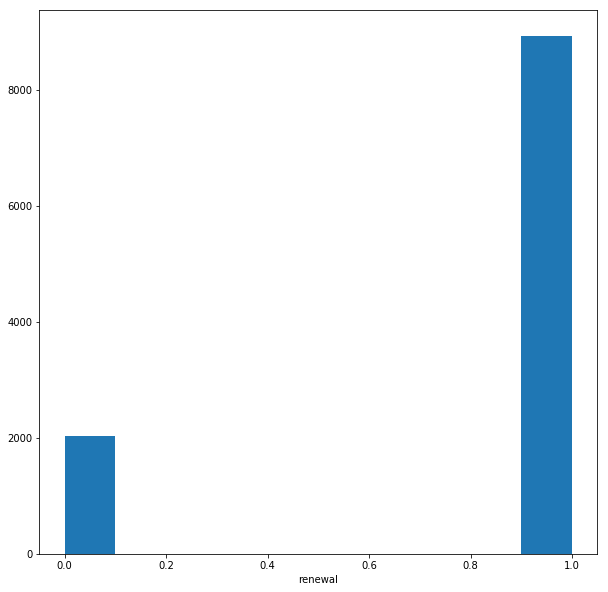

In [388]:
plot_histogram(processed_data["renewal"][processed_data["perc_premium_paid_by_cash_credit"] > 0.8])

More credit leads to lower rates of renewal

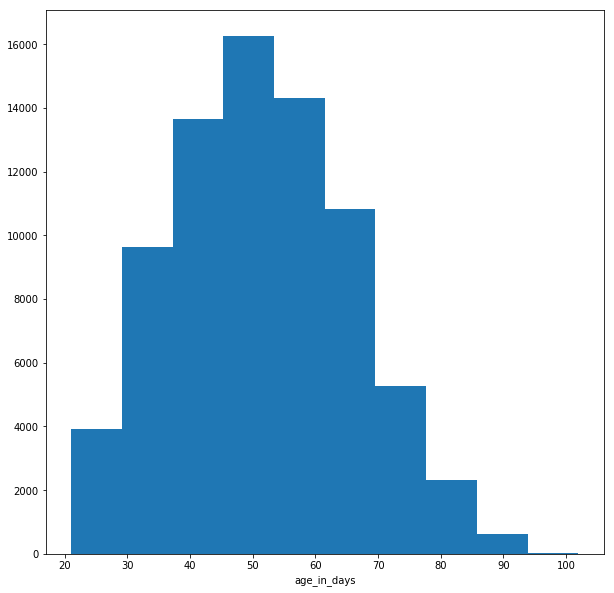

In [10]:
plot_histogram(processed_data["age_in_days"] / 365.25)

Age is basically normally distribute around mid-life

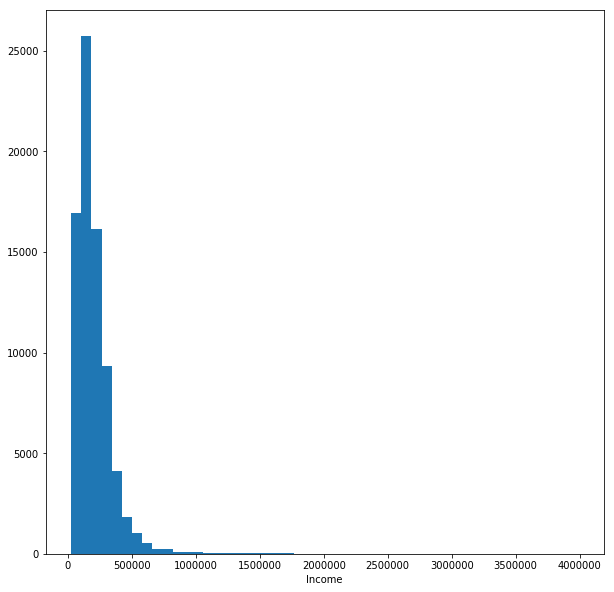

In [11]:
plot_histogram(processed_data["Income"][processed_data["Income"] < 4e6], bins=50)

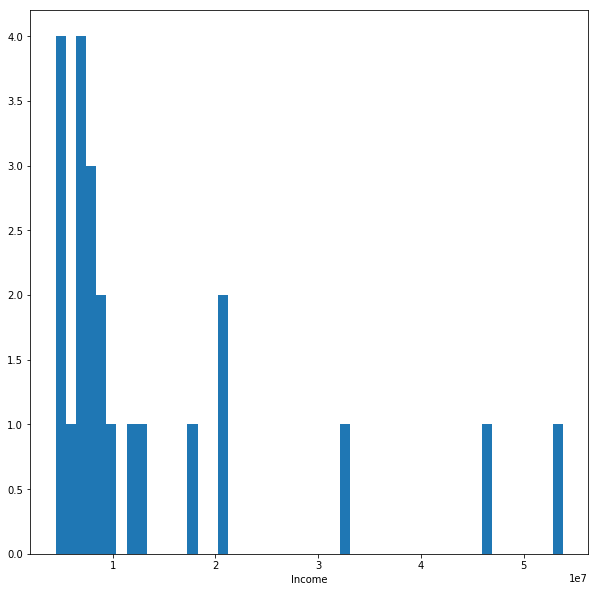

In [12]:
plot_histogram(processed_data["Income"][processed_data["Income"] > 4e6], bins=50)

In [13]:
processed_data[processed_data["Income"] > 4e6].sort_values("Income", axis=0, ascending=True)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
24738,38253,0.393,18256,4440150,1.0,0.0,0.0,99.89,4,1,1,60000,1
62732,50932,0.000,17899,4500070,0.0,0.0,0.0,99.64,12,3,1,60000,1
28267,57752,0.007,17527,4500110,0.0,0.0,0.0,99.86,10,3,1,60000,1
42340,58473,0.386,20815,5190070,0.0,0.0,0.0,99.86,7,1,1,60000,1
53535,81066,0.008,15704,6250050,1.0,0.0,0.0,99.88,13,1,0,24300,1
23076,24272,0.017,23008,6560280,0.0,0.0,0.0,99.89,5,0,1,60000,1
38109,110621,0.000,19357,7038040,4.0,1.0,1.0,99.78,19,0,1,60000,0
16685,27206,0.190,18263,7122030,0.0,0.0,0.0,99.86,12,3,1,60000,1
73295,58885,0.000,17167,7124830,0.0,0.0,0.0,99.86,10,3,0,60000,1
36370,14776,0.376,22639,7500070,0.0,0.0,0.0,99.85,17,0,0,60000,0


(array([ 0.01099547,  0.02080186,  0.03493089,  0.05148005,  0.07452017,
         0.09739242,  0.12839237,  0.1557971 ,  0.19023838,  0.21923787,
         0.25698058,  0.28933747,  0.32959823,  0.36450115,  0.3978093 ,
         0.42904706,  0.47182586,  0.49906273,  0.53095798,  0.55623636,
         0.59444071,  0.62060041,  0.64401824,  0.66898886,  0.69485479,
         0.71505512,  0.73844497,  0.75505008,  0.77843993,  0.79364613,
         0.81370656,  0.82839517,  0.84572772,  0.85896145,  0.87026467,
         0.88099435,  0.90228583,  0.91063735,  0.9268088 ,  0.93392927,
         0.94493873,  0.95211516,  0.95790666,  0.96418779,  0.97342063,
         0.97849869,  0.98683622,  0.99057132,  0.99669856,  1.        ]),
 array([  24030. ,   31548.8,   39067.6,   46586.4,   54105.2,   61624. ,
          69142.8,   76661.6,   84180.4,   91699.2,   99218. ,  106736.8,
         114255.6,  121774.4,  129293.2,  136812. ,  144330.8,  151849.6,
         159368.4,  166887.2,  174406. ,  1819

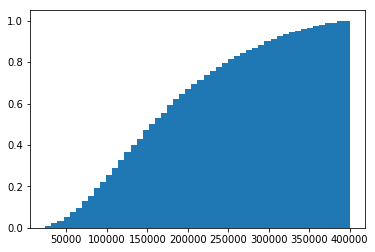

In [19]:
plt.hist(processed_data["Income"][processed_data["Income"] < 4e5], bins=50, cumulative=True, density=True) 

Highly left-skewed distribution. The average income is about 2e6 whic his less than 1/10 of the max. 80% of people have an income less than 2.5e6.

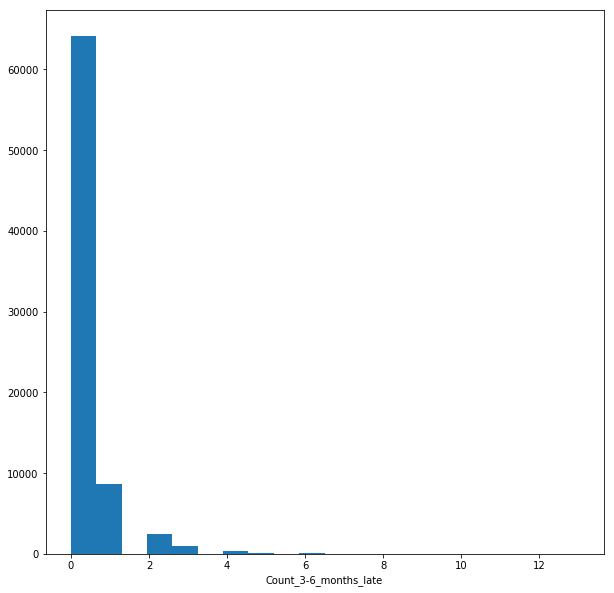

In [21]:
plot_histogram(processed_data["Count_3-6_months_late"], bins = 20)

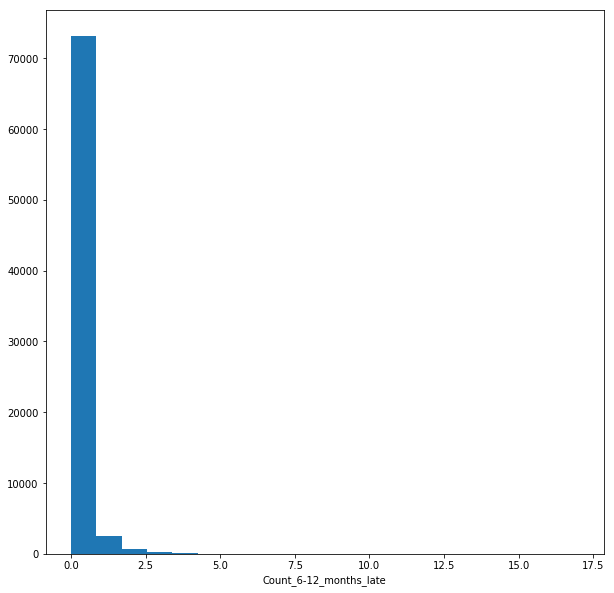

In [22]:
plot_histogram(processed_data["Count_6-12_months_late"], bins = 20)

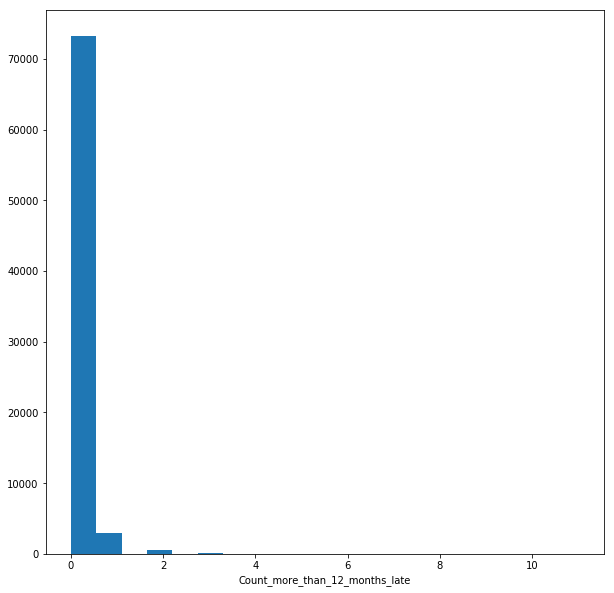

In [23]:
plot_histogram(processed_data["Count_more_than_12_months_late"], bins = 20)

Most people do pay their premiums on time. Would it be more informative to bucket people into a list of who has had a late payment and who hasn't?

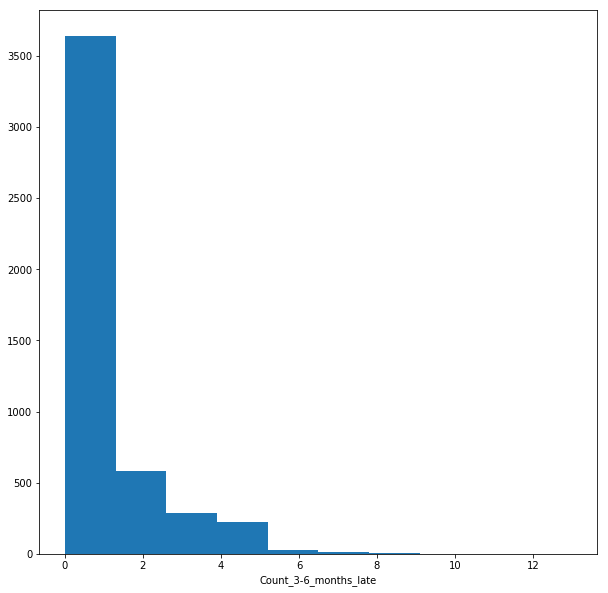

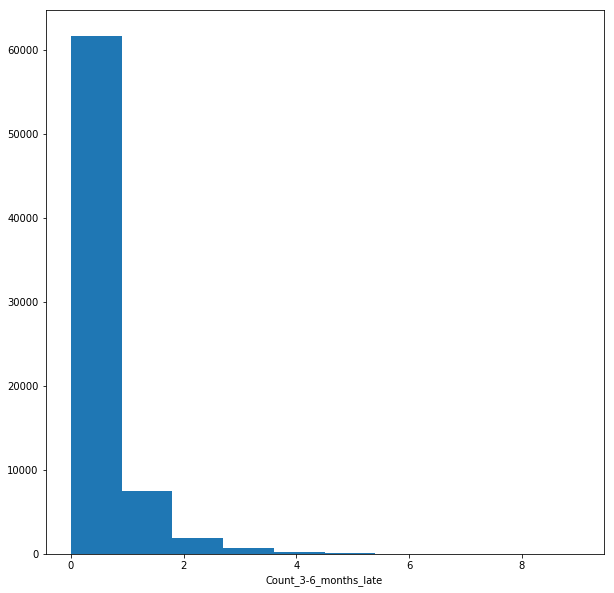

In [393]:
plot_histogram(processed_data["Count_3-6_months_late"][processed_data["renewal"] == False])
plot_histogram(processed_data["Count_3-6_months_late"][processed_data["renewal"] == True])

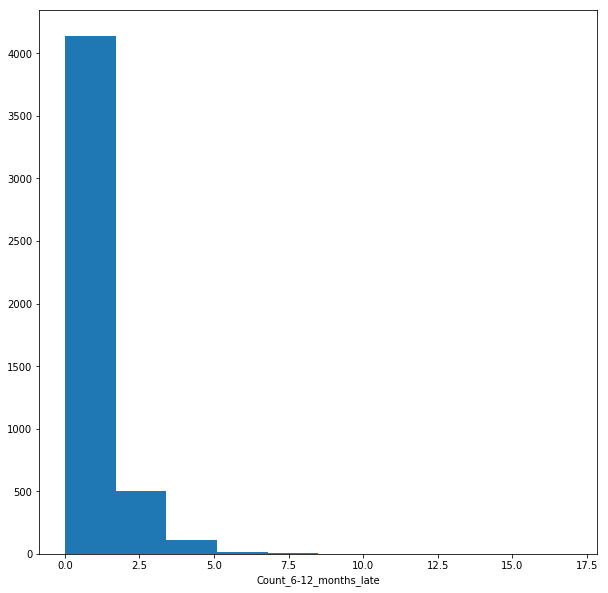

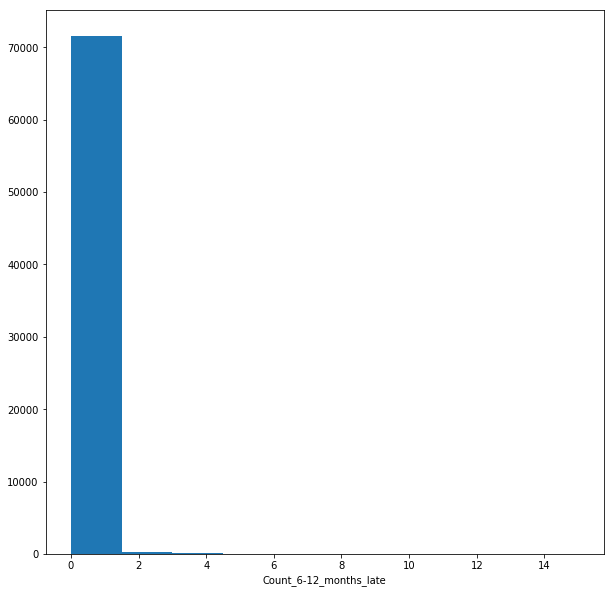

In [394]:
plot_histogram(processed_data["Count_6-12_months_late"][processed_data["renewal"] == False])
plot_histogram(processed_data["Count_6-12_months_late"][processed_data["renewal"] == True])

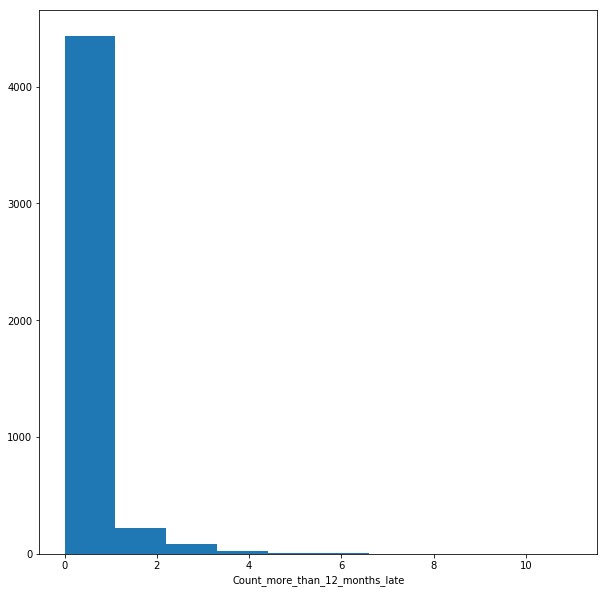

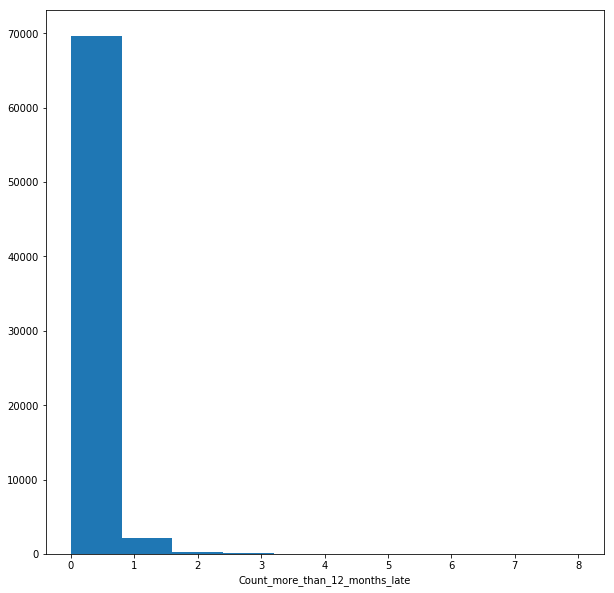

In [395]:
plot_histogram(processed_data["Count_more_than_12_months_late"][processed_data["renewal"] == False])
plot_histogram(processed_data["Count_more_than_12_months_late"][processed_data["renewal"] == True])

In [532]:
late_pay = processed_data["Count_3-6_months_late"] + np.power(processed_data["Count_6-12_months_late"], 1.5) + \
            np.power(processed_data["Count_more_than_12_months_late"],2.5)
late_pay.name = "h"

In [533]:
late_pay = pd.DataFrame(late_pay)

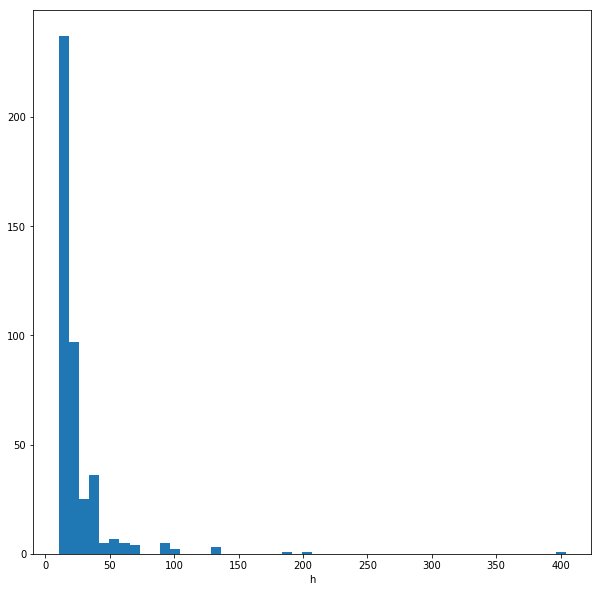

In [534]:
plot_histogram(late_pay["h"][late_pay["h"] > 10], bins=50)

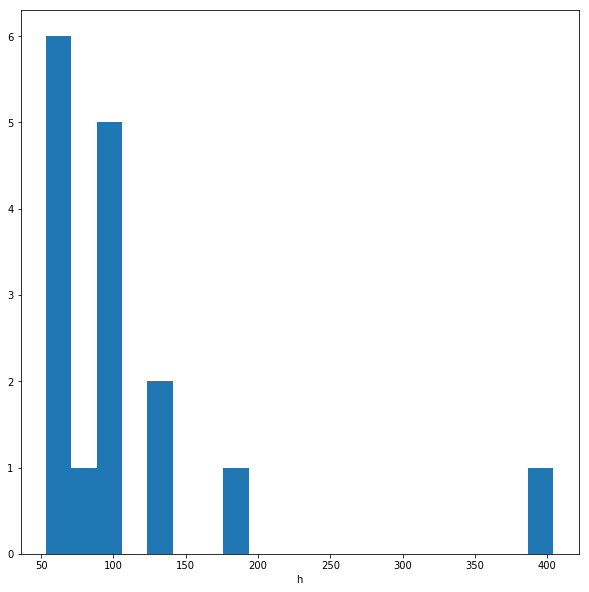

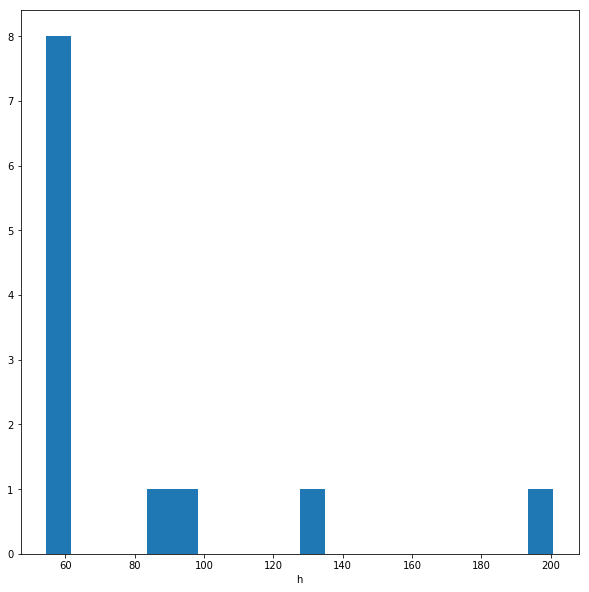

In [535]:
late_pay_con = pd.concat([late_pay, processed_data["renewal"]], axis=1)
plot_histogram(late_pay_con["h"][(late_pay_con["h"] > 50) & (late_pay_con["renewal"] == False)], bins=20)
plot_histogram(late_pay_con["h"][(late_pay_con["h"] > 50) & (late_pay_con["renewal"] == True)], bins=20)

In [487]:
# Let's bucket and see
c1 = (processed_data["Count_3-6_months_late"] > 3)
c2 = (processed_data["Count_6-12_months_late"] > 4) 
c3 = (processed_data["Count_more_than_12_months_late"] > 3)
c4 = (processed_data["perc_premium_paid_by_cash_credit"] > 0.8)
condition = c1 | c2 | c3

In [488]:
late_payment = np.where(condition, True, False)

In [489]:
late_payment = pd.DataFrame(late_payment)
late_payment[0].value_counts()

False    76067
True       788
Name: 0, dtype: int64

In [490]:
late_payment.shape, processed_data.shape, processed_data["renewal"].shape

((76855, 1), (76855, 14), (76855,))

In [491]:
late_payment = pd.concat([late_payment, processed_data["renewal"]], axis=1, ignore_index=True)

In [492]:
late_payment.columns = ["late", "renewal"]

In [493]:
late_payment["renewal"][(late_payment["late"] == True)].value_counts()

1    438
0    350
Name: renewal, dtype: int64

In [494]:
late_payment["renewal"][(late_payment["late"] == False)].value_counts()

1    71637
0     4430
Name: renewal, dtype: int64

Conclusively, the majority of people who pay on time have a far higher rate of renewal than those who have late payments 

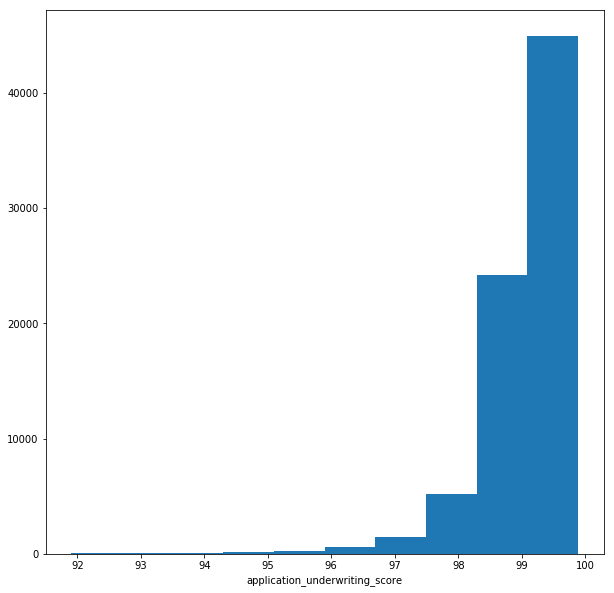

In [350]:
plot_histogram(processed_data["application_underwriting_score"])

Highly right-skewed. Are people towards the lower end less likely to renew?

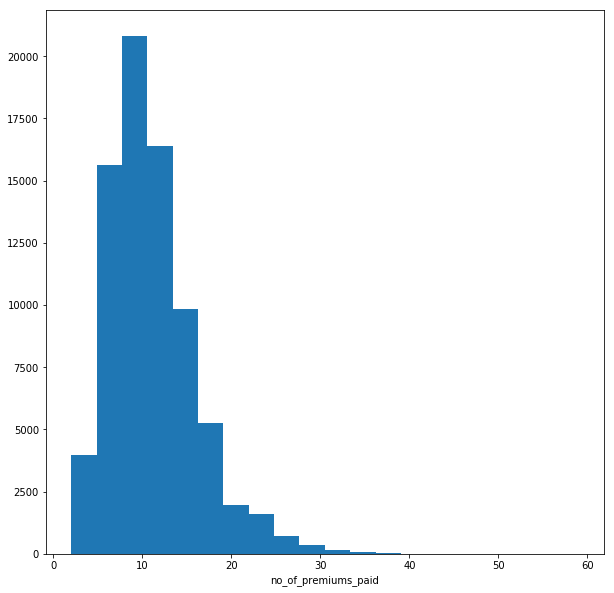

In [354]:
plot_histogram(processed_data["no_of_premiums_paid"], bins=20)

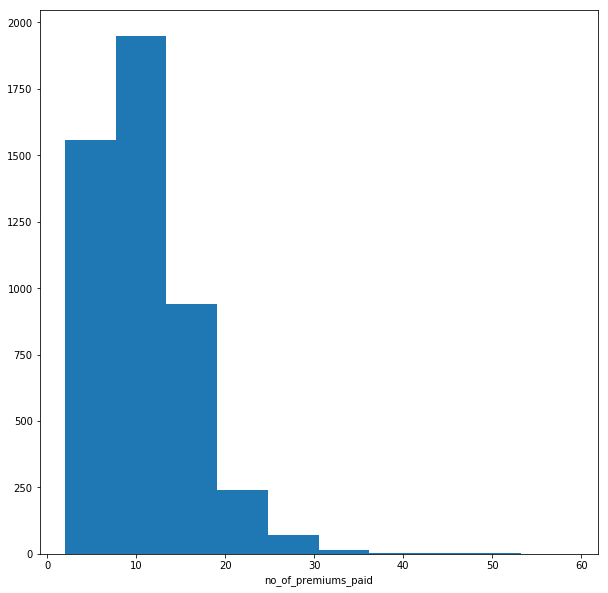

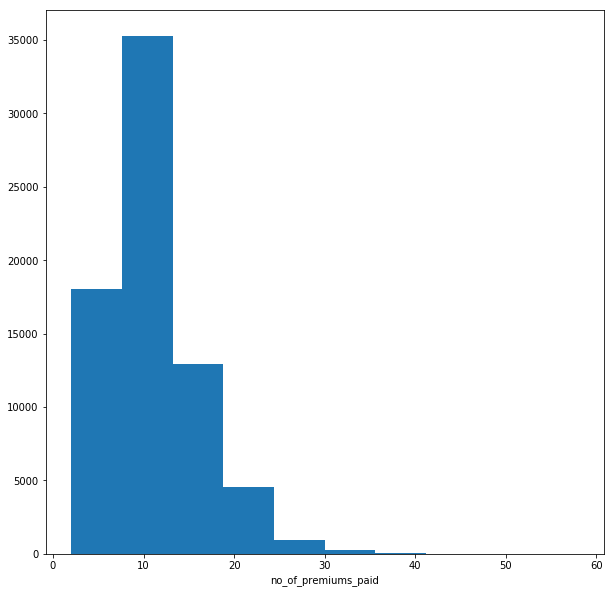

In [386]:
plot_histogram(processed_data["no_of_premiums_paid"][processed_data["renewal"] == False])
plot_histogram(processed_data["no_of_premiums_paid"][processed_data["renewal"] == True])

The top histogram indicates that a larger number of those that don't renew, haven't paid as many premiums. This could be an indication of loyalty 

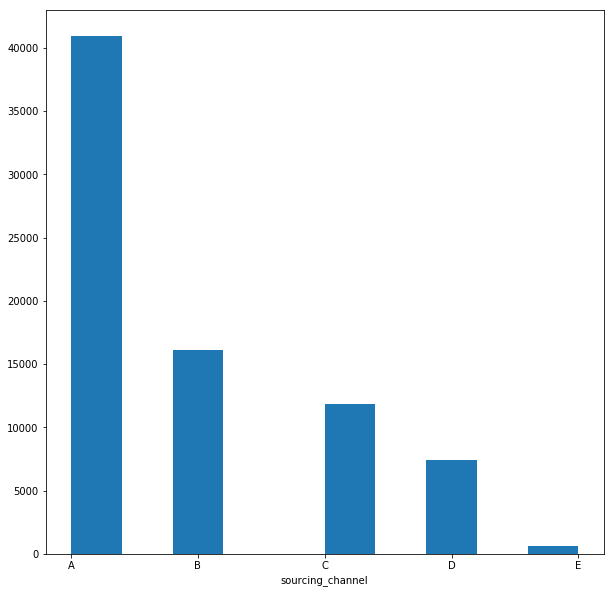

In [352]:
plot_histogram(processed_data["sourcing_channel"])

In [364]:
a1, a0 = processed_data["renewal"][processed_data["sourcing_channel"] == "A"].value_counts()
b1, b0 = processed_data["renewal"][processed_data["sourcing_channel"] == "B"].value_counts()
c1, c0 = processed_data["renewal"][processed_data["sourcing_channel"] == "C"].value_counts()
d1, d0 = processed_data["renewal"][processed_data["sourcing_channel"] == "D"].value_counts()
e1, e0 = processed_data["renewal"][processed_data["sourcing_channel"] == "E"].value_counts()

<Container object of 2 artists>

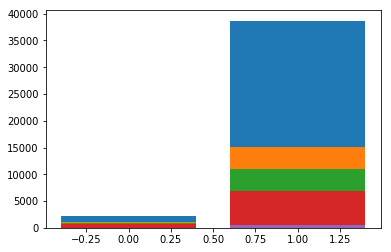

In [369]:
plt.bar((0,1), (a0, a1))
plt.bar((0,1), (b0, b1))
plt.bar((0,1), (c0, c1))
plt.bar((0,1), (d0, d1))
plt.bar((0,1), (e0, e1))

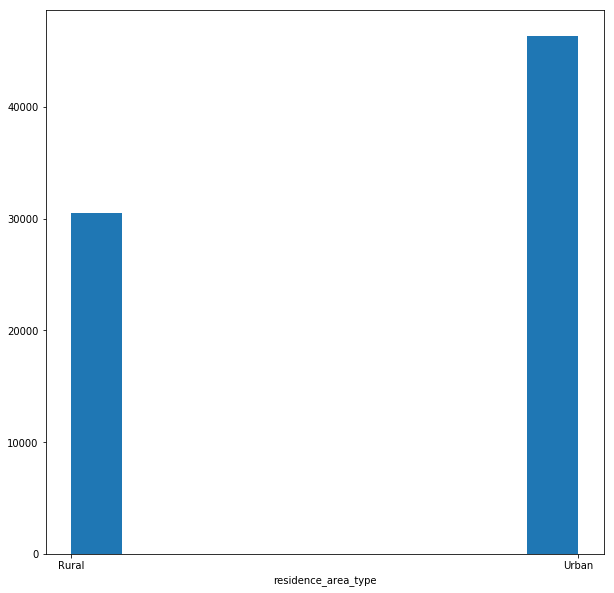

In [353]:
plot_histogram(processed_data["residence_area_type"])

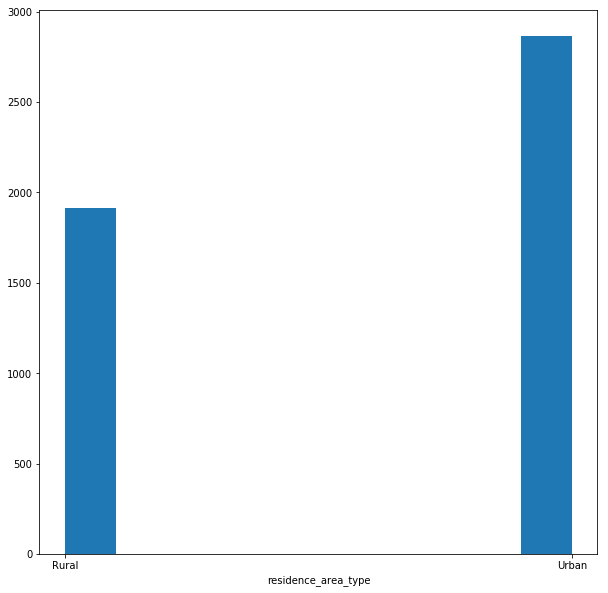

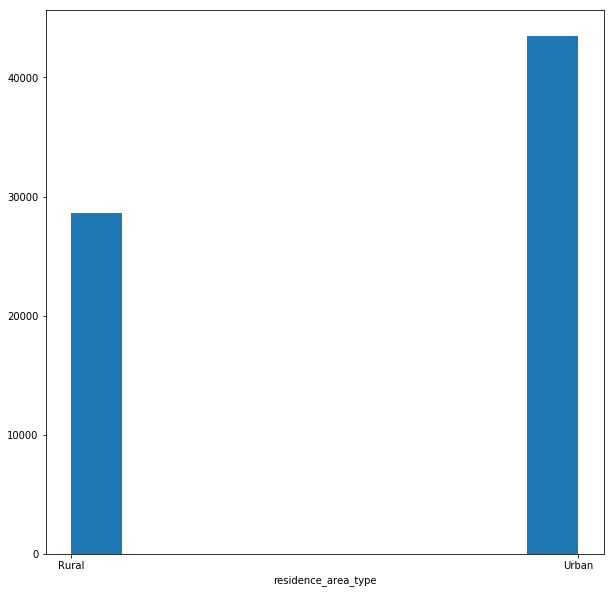

In [384]:
plot_histogram(processed_data["residence_area_type"][processed_data["renewal"] == False])
plot_histogram(processed_data["residence_area_type"][processed_data["renewal"] == True])

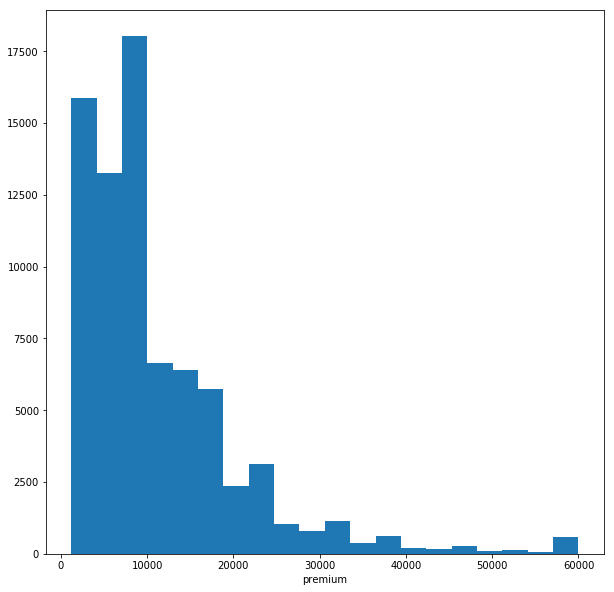

In [375]:
plot_histogram(processed_data["premium"], bins=20)

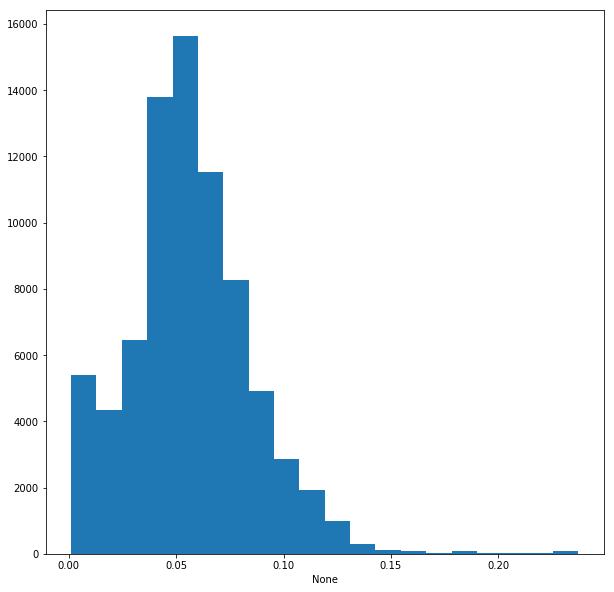

In [44]:
premium_rate_df = processed_data["premium"] / processed_data["Income"]
plot_histogram(premium_rate_df, bins=20)

In [45]:
premium_rate_df.reset_index()
premium_rate_df = pd.concat((premium_rate_df, processed_data["renewal"]), axis=1)

(array([ 604., 1255., 1668.,  820.,  292.,  103.,   21.,    7.,    6.,
           4.]),
 array([0.00222165, 0.02566075, 0.04909986, 0.07253896, 0.09597807,
        0.11941717, 0.14285628, 0.16629539, 0.18973449, 0.2131736 ,
        0.2366127 ]),
 <a list of 10 Patch objects>)

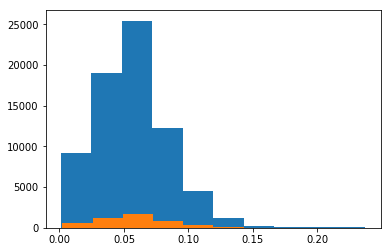

In [47]:
# plot_histogram(premium_rate_df[0][premium_rate_df["renewal"] == False])
plt.hist(premium_rate_df[0][premium_rate_df["renewal"] == True])
plt.hist(premium_rate_df[0][premium_rate_df["renewal"] == False])
# plot_histogram(premium_rate_df[0][premium_rate_df["renewal"] == True])

Independently these features don't give much away. Need to find a smart way to combine them.

In [ ]:
"""
Need to investigate:
1. correlations with each variable and prediction
2. Histograms
"""

In [ ]:
"""
Feature engineering
1. Binary labels for sourcing channel
"""

In [ ]:
"""
Questions: 
1. how to categorise the long tail
2. how to scale variables
"""

<Container object of 5 artists>

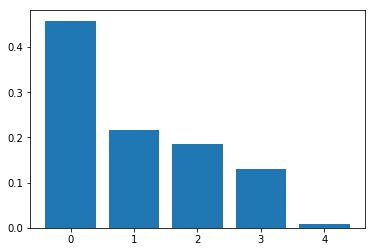

In [35]:
items = processed_data["sourcing_channel"][(processed_data["residence_area_type"] == "Urban") &
                                          (processed_data["renewal"] == 0)]
series, heights = items.value_counts().index, items.value_counts().values
series = list(range(len(series)))
plt.bar(series, heights / np.sum(heights))

<Container object of 5 artists>

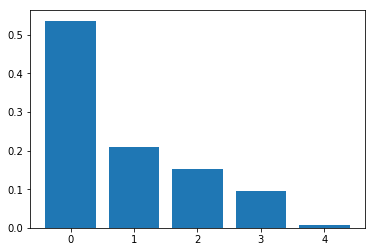

In [37]:
items = processed_data["sourcing_channel"][(processed_data["residence_area_type"] == "Urban") &
                                          (processed_data["renewal"] == 1)]
series, heights = items.value_counts().index, items.value_counts().values
series = list(range(len(series)))
plt.bar(series, heights / np.sum(heights))

<Container object of 5 artists>

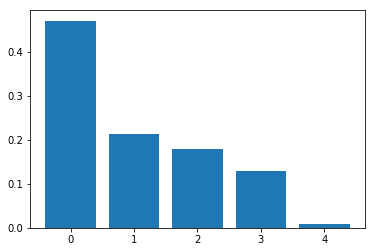

In [38]:
items = processed_data["sourcing_channel"][(processed_data["residence_area_type"] == "Rural") &
                                          (processed_data["renewal"] == 0)]
series, heights = items.value_counts().index, items.value_counts().values
series = list(range(len(series)))
plt.bar(series, heights / np.sum(heights))

<Container object of 5 artists>

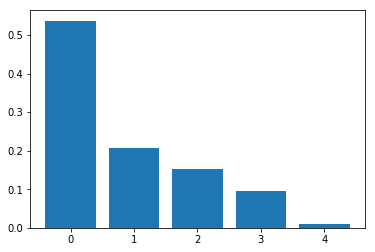

In [39]:
items = processed_data["sourcing_channel"][(processed_data["residence_area_type"] == "Rural") &
                                          (processed_data["renewal"] == 1)]
series, heights = items.value_counts().index, items.value_counts().values
series = list(range(len(series)))
plt.bar(series, heights / np.sum(heights))